Puzzle
----

https://thefiddler.substack.com/p/can-you-canoodle-at-the-coldplay

**This Week’s Fiddler**

This week’s puzzle comes from David Polidori:

All the many attendees at a particular Coldplay concert are couples. As the CEO of Astrometrics, Inc., you are in attendance with your romantic partner, who is definitely not the head of HR at Astrometrics, Inc. During the concert, the two of you spend half the time canoodling.

The camera operators love to show people on the jumbotron during the concert, but time is limited and there are many attendees. As a result, the camera operators show just 1 percent of couples during the concert. Couples are chosen randomly, but never repeat at any given concert.

You and your partner are shy when it comes to public displays of affection. While you don’t mind being shown on the jumbotron, you don’t want to be shown canoodling on the jumbotron.

How many Coldplay shows can the two of you expect to attend without having more than a 50 percent chance of ever being shown canoodling on the jumbotron?

**This Week’s Extra Credit**

Now, everyone at the concert spends at least some time canoodling. In particular, each member of a couple wants to spend some fraction of the time canoodling, where this fraction is randomly and uniformly selected between 0 and 1. This value is chosen independently for the two members of each couple, and the actual time spent canoodling is the product of these values. For example, if you want to canoodle during half the concert and your partner wants to canoodle during a third of the concert, you will actually canoodle during a sixth of the concert.

Meanwhile, the camera operators love to show canoodling couples. So instead of randomly picking couples to show on the jumbotron, they randomly pick from among the currently canoodling couples. (The time shown on the jumbotron is very short, so a couple’s probability of being selected is proportional to how much time they spend canoodling.)

Looking around the concert, you notice that the kinds of couples who most frequently appear on the jumbotron aren’t constantly canoodling, since there are very few such couples. Indeed, the couples who most frequently appear on the jumbotron spend a particular fraction C of the concert canoodling. What is the value of C?

Fiddler Solution
----

P(shown on jumbotron at one concert) = 1/100

P(shown on jumbotron while canoodling at one concert) = 1/200

P(not shown on jumbotron while canoodling at one concert) = 1 - 1/200 = 0.995

P(not shown on jumbotron while canoodling at N concerts) = 0.995^N

Now, we want that to be less than 50%. So:

$0.995 ^ N <= 0.5$

$N log(0.995) <= log(0.5)$

$ N <= log(0.5) / log (0.995)$

In [45]:
from math import log, log2
N = log(0.5) / log(0.995)
N_using_2 = log2(1-(1/2)) / log2(1-(1/2)*(1/100)) # just to make sure.
print(f"Using e: N={N}")
print(f"Using 2: N={N_using_2}")

Using e: N=138.28257298606084
Using 2: N=138.28257298606084


So, the Fiddler answer is **138**

Extra Credit Solution
---

Let $x$ be the canoodling fraction of the first partner in a couple, and $y$ be the fraction of the second partner.

So, all the couples are uniformly distributed as points in the unit square from $(0,0)$ to $(1,1)$, and each couple's probability of being shows is $z = x \times y$.

We can approximate the actual discrete distribution by doing integrals instead.

Doing these continuous distribution probability stuff is very tricky, so I am going to do it very carefully.

Total sample space:

$ \int_{0}^{1} dx \int_{0}^{1} dy (xy) $

$ = \int_{0}^{1} dx(x) \times \int_{0}^{1} dy (y) $

$ = [ (x^2/2)\big|_0^{1} ] \times [ (y^2/2)\big|_0^{1} ] $

$ = 1/2 \times 1/2 = 1/4 $

Now the probability that the jumbotron displays couples that canoodle greater than a threshold $t$ would be a similar integral with limits modified to just the space where $xy > t$, divided by the total volume $(1/4)$.

P(display couples with xy > t)

$ = P(xy > t)$

$ = 4 \int_{t}^{1} dx \int_{t/x}^{1} dy (xy) $

$ = 4 \int_{t}^{1} dx (x) \int_{t/x}^{1} dy (y) $

$ = 4 \int_{t}^{1} dx (x) \times [ (y^2/2)\big|_{t/x}^{1} ] $

$ = 4 \int_{t}^{1} dx (x) \times [ (1/2) - (t^2/(2x^2)) ] $

$ = 4 \int_{t}^{1} dx [ (x/2) - (t^2/(2x)) ] $

$ = 4 [ (x^2/4) - (t^2ln(x)/2) \big|_{t}^1 ] $

$ =  (x^2 - 2t^2ln(x)) \big|_{t}^1  $

$ = 1 - (t^2 - 2t^2ln(t)) $

$ P (xy > t) = 1 - t^2(1 - 2ln(t)) $

At t = 1, P = 0. At t = 0, P = 1.
This makes sense.

Now, the probability that we are actually interested in maximizing is $P(xy = t)$, but that's zero everywhere. So, almost equivalently, we can maximize $P(xy = t) / dt$

$ P(xy = t)/dt  ~= (P(xy > t) - P (xy > t+dt))/dt $

And in the limit that $dt$ goes to zero, this becomes the negative of the derivative.

$ P(xy = t) = -d/dt(1 - t^2 + 2t^2 ln(t)) $

$ P(xy = t) = -(-2t + 4t ln(t) + 2t) $

$ P(xy = t) = -4tln(t) $

Now to find the maxima of this, we take the derivative again.

$ d/dt P(xy = t) = -4ln(t) - 4 $

$ d/dt P(xy = t) = -4 (1 + ln(t)) $

Since that must be 0 at $t=C$, we get:

$1 + ln(C) = 0 $

$ln(C) = -1 $

$C = e^{-1} $

$C = 1 / e $

In [30]:
from math import e
C = e**(-1)
print(f"{C=}")

C=0.36787944117144233


Some plots to make sure. Very helpful - flagged a number of errors in the work above - now fixed.

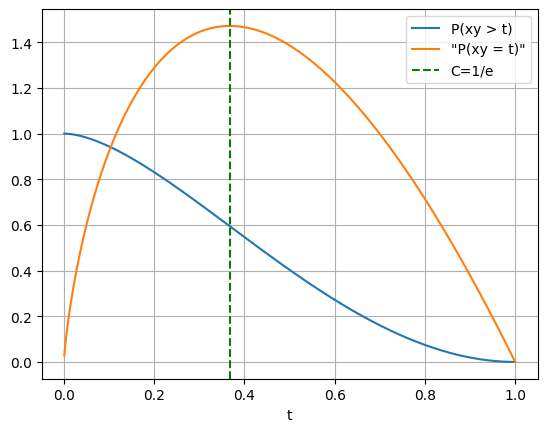

In [46]:
from math import log
import matplotlib.pyplot as plt
def Pxy_gt_t(t):
    return (1 - t*t*(1 - 2*log(t)))
def Pxy_eq_t(t):
    return -4*t*log(t)

N=1000
x = [1.0*i/N for i in range(1, N+1)]
y1 = [Pxy_gt_t(t) for t in x]
y2 = [Pxy_eq_t(t) for t in x]
plt.plot(x, y1, label="P(xy > t)")
plt.plot(x, y2, label='"P(xy = t)"')
plt.axvline(x=C, color='g', linestyle='--', label="C=1/e")
plt.legend()
plt.xlabel("t")
plt.grid()
pass


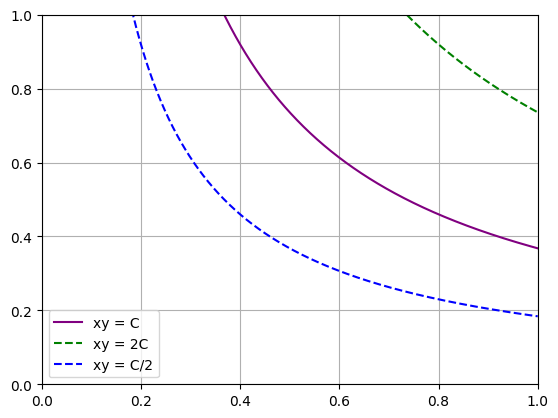

In [48]:
y3 = [C/_x_ for _x_ in x]
y4 = [(2*C)/_x_ for _x_ in x]
y5 = [(0.5*C)/_x_ for _x_ in x]
plt.plot(x, y3, label="xy = C", color='purple')
plt.plot(x, y4, label="xy = 2C", color='green', linestyle='--')
plt.plot(x, y5, label="xy = C/2", color='blue', linestyle='--')
plt.axis([0, 1, 0, 1])
plt.legend()
plt.grid()
pass

So, in conclusion, the value of C is 0.36787944117144233, i.e. the most common canoodling fraction for couples featured on the jumbotron is 0.367879....